In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Análisis Dicriminante Lineal

In [2]:
#Apertura de archivo csv a un dataframe de pandas

#revisar la ruta para tu caso particular
ruta = "c:\\Users\\jrgui\\Documents\\GitHub\\Machine_Learning\\Reduccion_de_Dimension\\datasets\\Wine.csv"
dataset = pd.read_csv(ruta)
dataset.head(5)

#informacion de caracteristicas de distintos vinos y luego se clasifica a que tipo de perosna
#va dirigido el vino

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
#Algoritmo de componetes principales aplicado a una regresion logistica 

#Para poder dejar 2 componetes y poder graficar

#Sacar las variables independientes
X = dataset.iloc[:, 0:13].values
# Sacar la variable dependientes
y = dataset.iloc[:,13].values

#Division de Datos - entrenamiento y validacion
#herramienta para dividir los datos
from sklearn.model_selection import train_test_split
#divide los datos en 20% para la validacion y se colocar una semilla para hacer la division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Escalado de Variables - Estandarizacion y Normalizacion
#Es preferible utilizalo en algortimos que usan el calculo de distancia - pitagoras 
#Estandarizacion
from sklearn import preprocessing
sc_X = preprocessing.StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)




#Ajuste Analisis Discriminante Lineal - 2 componentes

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#Se utilizan 2 componentes para hacer el grafico
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)






#continuacion de la regresion logistica
from sklearn.linear_model import LogisticRegression
#Ajuste de regresion logistica en el conjunto de entrenamiento
clasificador = LogisticRegression(random_state=0)
clasificador.fit(X_train,y_train)

#Prediccion de los resultados con el conjusto de testing
y_pre = clasificador.predict(X_test)
#respuesta del modelo
print(y_pre) 
#Valores dados por los datos de testing
print(y_test) 

#Comprobacion del resultado - Matriz de confucion
#No se analisa igual que a la matiz de 2 dimensiones
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
cm

#Se creo una clasificacion perfecta...! :-)


[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]
[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]


array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

C:\Users\jrgui\AppData\Local\Temp\ipykernel_1124\3649336438.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


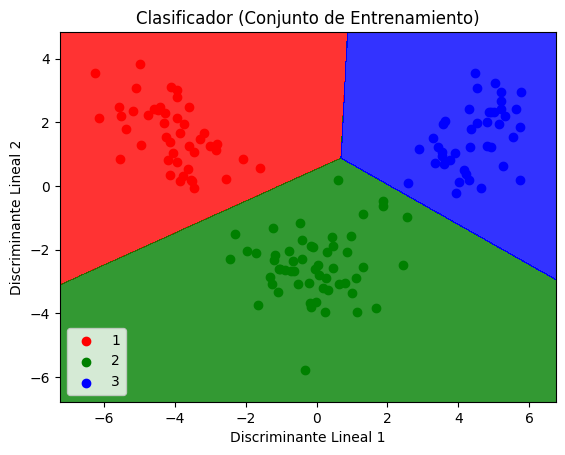

In [10]:
#Visualizacion de conjunto de entrenamiento

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.8, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Discriminante Lineal 1')
plt.ylabel('Discriminante Lineal 2')
plt.legend()
plt.show()

C:\Users\jrgui\AppData\Local\Temp\ipykernel_1124\558084603.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


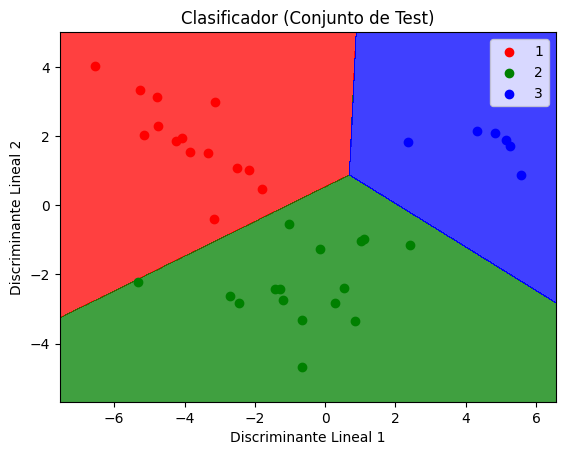

In [11]:
#Visualizacion del conjunto de prueba
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Discriminante Lineal 1')
plt.ylabel('Discriminante Lineal 2')
plt.legend()
plt.show()